In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent)
first_row = session.query(measurement).first()
first_row.__dict__

('2017-08-23',)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bbefe7c490>,
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01'}

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '2017-07-02'),
  Text(0.0, 0, '2016-08-24'),
  Text(250.0, 0, '2016-10-06'),
  Text(500.0, 0, '2016-11-17'),
  Text(750.0, 0, '2017-01-01'),
  Text(1000.0, 0, '2017-02-14'),
  Text(1250.0, 0, '2017-04-01'),
  Text(1500.0, 0, '2017-05-15'),
  Text(1750.0, 0, '2017-06-29'),
  Text(2000.0, 0, '2017-08-19'),
  Text(2250.0, 0, '')])

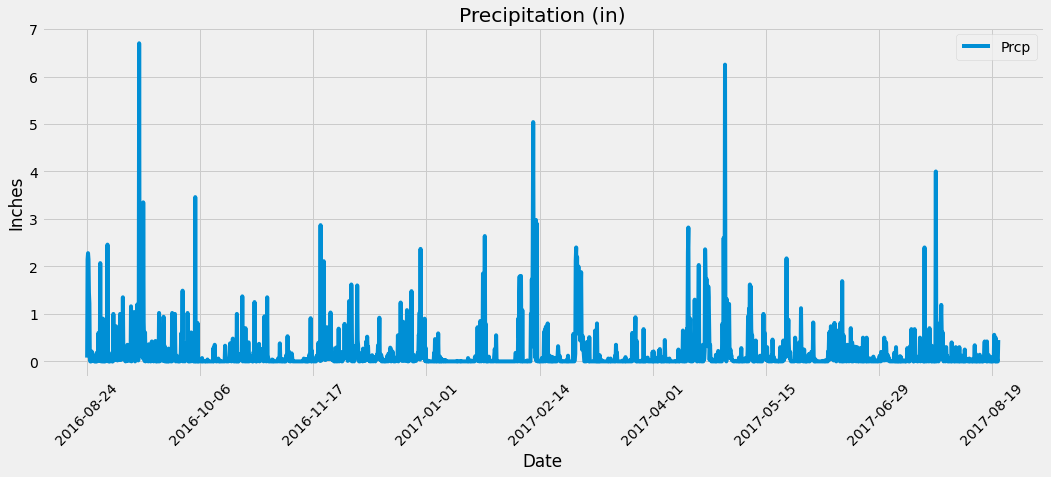

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

import datetime as dt
from datetime import date


# Calculate the date one year from the last date in data set.
most_recent_date_str = most_recent.date
most_recent_date = date.fromisoformat(most_recent_date_str)
one_year_ago = date((most_recent_date.year - 1), most_recent_date.month, most_recent_date.day).isoformat()

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.station, measurement.prcp).\
    filter (measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data, columns =['Date', 'Station', 'Prcp'])
data_df = data_df.set_index('Date')

# Sort the dataframe by date
data_df.sort_index(inplace = True, ascending=True)
data_df = data_df.dropna(how='any')


# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(figsize = (16,6))
plt.title('Precipitation (in)')
plt.ylabel('Inches')
plt.xticks(rotation = 45)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations = data_df['Station'].unique()
stations = len(stations)
stations

7

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = data_df.groupby(['Station']).size().sort_values(ascending=False)
station_activity

Station
USC00519397    358
USC00519281    351
USC00513117    342
USC00516128    327
USC00519523    313
USC00514830    264
USC00517948     60
dtype: int64

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_activity.index[0]


most_active_df = pd.DataFrame(data_df.loc[(data_df['Station'] == most_active)])
most_active_df.describe()

,Prcp
count,358.000000
mean,0.044944
std,0.189059
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


Text(0, 0.5, 'Frequency of Temperature')

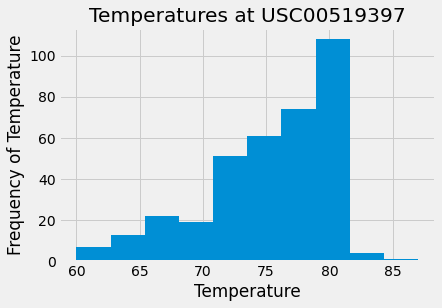

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(measurement.date, measurement.station, measurement.tobs).all()
temp_data_df = pd.DataFrame(temp_data, columns = ['Date', 'Station', 'Temp'])
temp_data_df = temp_data_df.loc[(temp_data_df['Station'] == most_active)]

# Calculate the date one year from the last date in data set.
one_year_ago = date((most_recent_date.year - 1), most_recent_date.month, most_recent_date.day).isoformat()

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.station, measurement.tobs).\
    filter (measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data, columns =['Date', 'Station', 'Temp'])
data_df = data_df.set_index('Date')

# Sort the dataframe by date
data_df.sort_index(inplace = True, ascending=True)
data_df = data_df.dropna(how='any')
data_df = data_df.loc[(data_df['Station'] == most_active)]

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(data_df['Temp'])
plt.title('Temperatures at USC00519397')
plt.xlabel('Temperature')
plt.ylabel('Frequency of Temperature')

# Close session

In [16]:
# Close Session
session.close()